In [18]:
ppldir='/users/PCON0003/cond0088/Projects/detectors/sw_outputs/PPL_output'
#ir_file = open('%s/amidebug3_summary.txt'%ppldir) # this is a run with FULLNL turned off
ir_file = open('%s/ppl_18241_withNL_apr12_summary.txt'%ppldir)  # FULLNL turned to True True True
#ir_file = open('%s/ppl_18241_noNL_apr12_summary.txt'%ppldir)
ir_data = np.loadtxt(ir_file)
ir_file.close()
bfe = np.ma.masked_where(ir_data[:,13:38]==0, ir_data[:,13:38])
out_bfe_arr = bfe.reshape(bfe.shape[0],5,5)
avg_bfe_arr = np.mean(out_bfe_arr,axis=0)
print(np.round(1.E6*avg_bfe_arr,decimals=4))
g = ir_data[:,5].copy()
print(g.mean())
alphah = ir_data[:,6].copy()
alphav = ir_data[:,7].copy()
print(alphah.mean(), alphav.mean(), ((alphah+alphav)/2.).mean())
print(alphah.std()/np.sqrt(32**2 - 1), alphav.std()/np.sqrt(32**2 - 1))

[[-0.0069 0.0097 0.0146 0.0146 0.0037]
 [0.0027 0.0801 0.307 0.0951 0.0044]
 [0.0204 0.2734 -1.2972 0.2734 0.0202]
 [0.026 0.0935 0.3123 0.1002 0.002]
 [0.0053 0.0087 0.0143 0.0004 -0.0037]]
1.9772986925781253
0.017983968303710934 0.008730234910644532 0.013357101607177735
0.00013791676354685508 7.067996676739213e-05


In [17]:
ppldir='/users/PCON0003/cond0088/Projects/detectors/sw_outputs/PPL_output'
#ir_file = open('%s/amidebug3_summary.txt'%ppldir) # this is a run with FULLNL turned off
#ir_file = open('%s/ppl_18241_withNL_apr12_summary.txt'%ppldir)
ir_file = open('%s/ppl_18241_noNL_apr12_summary.txt'%ppldir)  # this one had FULLNL turned off
ir_data = np.loadtxt(ir_file)
ir_file.close()
bfe = np.ma.masked_where(ir_data[:,13:38]==0, ir_data[:,13:38])
out_bfe_arr = bfe.reshape(bfe.shape[0],5,5)
avg_bfe_arr = np.mean(out_bfe_arr,axis=0)
print(np.round(1.E6*avg_bfe_arr,decimals=4))
g = ir_data[:,5].copy()
print(g.mean())
alphah = ir_data[:,6].copy()
alphav = ir_data[:,7].copy()
print(alphah.mean(), alphav.mean(), ((alphah+alphav)/2.).mean())


[[-0.0016 0.0023 0.0164 0.0098 0.0066]
 [0.0034 0.0855 0.2619 0.0798 0.024]
 [0.0213 0.2268 -1.3275 0.2272 0.0225]
 [0.005 0.0806 0.2572 0.0673 0.0039]
 [0.0043 0.0144 0.0169 0.01 -0.0047]]
1.9746477752929688
0.018059509368164063 0.008786368977539063 0.013422939172851561


In [15]:
import pyirc
pplf='/fs/scratch/cond0080/PPL_data/H4RG-18241/2021-01-22/PPL_sample_nocoldmask_0061.fits'
ppld='/fs/scratch/cond0080/PPL_data/H4RG-18241/2021-01-22/PPL_sample_nocoldmask_0041.fits'
formatpars=5
xyrange=[0,4096,0,4096] # Remember that the first four rows and columns are reference pixels
tslices=[1, 2]
# Recommended True (False defaults to astropy tools, which work but are slow because of the way this script works)
use_fitsio = True

# Get dimensions of output cube
nxuse = xyrange[1]-xyrange[0]
nyuse = xyrange[3]-xyrange[2]
ntslice_use = len(tslices)
realcube = np.zeros((ntslice_use, nyuse, nxuse))
darkcube = np.zeros_like(realcube)
realcube=pyirc.load_segment(pplf, formatpars, xyrange, tslices, verbose=True)
darkcube=pyirc.load_segment(ppld, formatpars, xyrange, tslices, verbose=True)

Reading: /fs/scratch/cond0080/PPL_data/H4RG-18241/2021-01-22/PPL_sample_nocoldmask_0061.fits
Reading: /fs/scratch/cond0080/PPL_data/H4RG-18241/2021-01-22/PPL_sample_nocoldmask_0041.fits


In [16]:
print(realcube[0][100:105,100:105])
print(realcube[1][100:105,100:105])
print("DARK")
print(darkcube[0][100:105,100:105])
print(darkcube[1][100:105,100:105])

[[55574. 56077. 55688. 56430. 55922.]
 [55871. 56088. 56851. 56468. 55893.]
 [55508. 55862. 55795. 55068. 55924.]
 [55797. 55822. 55725. 56317. 55897.]
 [55950. 55532. 55737. 55402. 55978.]]
[[54136. 54680. 54228. 54938. 54449.]
 [54427. 54619. 55322. 54988. 54431.]
 [54032. 54443. 54309. 53645. 54466.]
 [54275. 54426. 54249. 54858. 54417.]
 [54515. 54211. 54367. 53982. 54458.]]
DARK
[[55738. 56255. 55933. 56673. 56109.]
 [56099. 56339. 57026. 56654. 56160.]
 [55762. 56015. 55960. 55302. 56104.]
 [55996. 56055. 55931. 56527. 56109.]
 [56150. 55735. 55960. 55618. 56186.]]
[[55661. 56178. 55839. 56594. 56032.]
 [56021. 56263. 56961. 56555. 56072.]
 [55673. 55934. 55886. 55230. 56018.]
 [55914. 55958. 55847. 56450. 56029.]
 [56064. 55648. 55878. 55527. 56066.]]


In [21]:
# From Chaz's email, this is his IPC from hot pixels
cs_ipc = np.array(([ 0.00185,  0.01413,  0.00184],[ 0.01924,  0.9322,   0.01831],[ 0.0014,   0.00948,  0.00154]))
gsfc_ipc = np.array(([ 0.002, 0.018, 0.002], [0.021, 0.914, 0.021], [0.002, 0.017, 0.002]))
print("Chaz: ",cs_ipc)
print(cs_ipc[0,1], cs_ipc[2,1])
cs_ah = np.mean((cs_ipc[1,0], cs_ipc[1, 2]))
cs_av = np.mean((cs_ipc[0,1], cs_ipc[2,1]))
print("alpha_h: ",cs_ah, " alpha_v: ", cs_av)
print("alpha_h - offset: ", cs_ah-0.0006, " alpha_v - offset: ", cs_av-0.0006)
print("Goddard: ",gsfc_ipc)
gsfc_ah = np.mean((gsfc_ipc[1,0], gsfc_ipc[1, 2]))
gsfc_av = np.mean((gsfc_ipc[0,1], gsfc_ipc[2,1]))
print("alpha_h: ",gsfc_ah, " alpha_v: ", gsfc_av)


Chaz:  [[0.00185 0.01413 0.00184]
 [0.01924 0.9322  0.01831]
 [0.0014  0.00948 0.00154]]
0.01413 0.00948
alpha_h:  0.018775  alpha_v:  0.011805
alpha_h - offset:  0.018175  alpha_v - offset:  0.011205
Goddard:  [[0.002 0.018 0.002]
 [0.021 0.914 0.021]
 [0.002 0.017 0.002]]
alpha_h:  0.021  alpha_v:  0.0175


In [1]:
# Tests
# PSF is like Airy profile, FWHM~1.03 lambda F, with f/8 setup https://arxiv.org/pdf/1801.06599.pdf
# I think Y-band (970-1070 nm)
# But Chaz also sent a fits with the PSF profile, dated April 7
# Could fit a Gaussian to it to get the rms per axis sigma for input into Chris's formula 7
fdir='/fs/scratch/cond0080/PPL_data/H4RG-18241/2021-01-22'
psffile='%s/PPLPSF_lamda1_cd3_f8_pix1_noboxcar.fits'%fdir

import astropy.io.fits as fits
hdu = fits.open(psffile)
import matplotlib.pyplot as plt
plt.imshow(hdu[0].data)

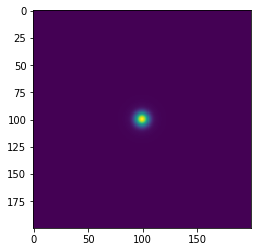

In [5]:
import matplotlib.pyplot as plt
plt.imshow(hdu[0].data)

In [6]:
# From https://scipy-cookbook.readthedocs.io/items/FittingData.html
def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-x)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-y)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

Text(0.95,0.05,'\nx : 99.5\ny : 99.5\nwidth_x : 4.4\nwidth_y : 4.4')

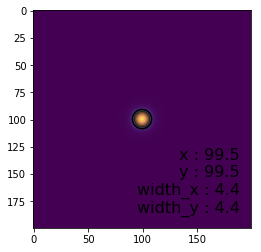

In [9]:
import numpy as np
from scipy import optimize
params = fitgaussian(hdu[0].data)
fit = gaussian(*params)
plt.imshow(hdu[0].data)
plt.contour(fit(*np.indices(hdu[0].data.shape)), cmap=plt.cm.copper)
ax = plt.gca()
(height, x, y, width_x, width_y) = params

plt.text(0.95, 0.05, """
x : %.1f
y : %.1f
width_x : %.1f
width_y : %.1f""" %(x, y, width_x, width_y),
        fontsize=16, horizontalalignment='right',
        verticalalignment='bottom', transform=ax.transAxes)